# Filipino Family Income and Expenditure: Household Head

This notebook is an exploration of the Filipino Family Income and Expenditure dataset. The dataset was acquired from [Kaggle](https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure) which was gathered by the Philippine Statistics Authority.


In [22]:
import pandas as pd

In [23]:
# Loading data
data = pd.read_csv('Family Income and Expenditure.csv')
y = data['Total Household Income']

Data Exploration

In [6]:
householdhead_data_columns = data.filter(like='Household Head').columns.tolist()

In [7]:
replacement_dict = {
    '.*Programs$': 'Degree',
    '^Grade.*|Elementary Graduate': 'Elementary',
    '.*College$': 'College Undergrad',
    '.*High School$|High School Graduate': 'High School',
    '^Other Programs.*|.*Post Secondary$': 'Post Secondary',
    'No Grade Completed|Preschool$': 'Pre Elem',
}

# Perform the replacements using regex
data['Household Head Highest Grade Completed'] = data['Household Head Highest Grade Completed'].replace(replacement_dict, regex=True)
data['Household Head Highest Grade Completed'].unique()

array(['Degree', 'Elementary', 'High School', 'College Undergrad',
       'Post Secondary', 'Pre Elem', 'Post Baccalaureate'], dtype=object)

Data Pre-Processing

In [8]:
# Finding columns with NaN values
columns_with_nan = data.columns[data.isna().any()].tolist()

# Replacing NaN values with 'U' in the identified columns
data[columns_with_nan] = data[columns_with_nan].fillna('U')

Prediction

In [17]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import numpy as np

In [18]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
cols = data.columns
for col in cols:
    data[col] = ordinal_encoder.fit_transform(np.array(data[col]).reshape(-1, 1))

In [19]:
# Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(data, y, test_size=0.2, random_state=42)

In [20]:
rfr = RandomForestRegressor(verbose=True, n_jobs=-1, n_estimators=10)
rfr.fit(X_train, y_train)
rfr.score(X_val, y_val)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9729053385070094

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


[Text(0.5, 0, 'Total Household Income'), Text(0, 0.5, 'Predicted TIH')]

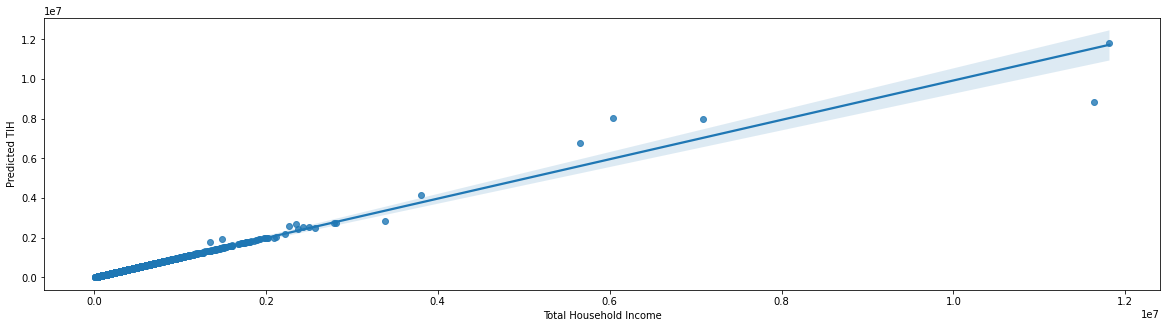

In [21]:
y_rfr_predict = rfr.predict(data)
mean_squared_error(y, y_rfr_predict)
plt.figure(figsize=(20,5))
ax = sns.regplot(x=y, y = y_rfr_predict)
ax.set(xlabel='Total Household Income', ylabel='Predicted TIH')